# Concrete Strength Prediction

Pada Notebook ini, saya akan memprediksi kekuatan beton berdasarkan kolom-kolom pencampurannya. Berikut adalah kolom-kolom yang tersedia :

1) Cement (Kg/m3)

2) Blast Furnace Slag (Kg/m3)

3) Fly Ash (Kg/m3)

4) Water (Kg/m3)

5) Superplasticizer (Kg/m3)

6) Coarse Aggregate (Kg/m3)

7) Fine Aggregate (Kg/m3)

8) Age (Day)

9) Strength of Concrete (MPa)

Berikut adalah langkah-langkah pengolahan data dalam notebook ini :

1) **Data Pre-Processing**

2) **Data Modelling**

3) **Hyperparammeter Tuning**

4) **Kesimpulan**

## Data Pre-Processing

In [397]:
# Import Modul yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly.express as px
import missingno
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [398]:
df = pd.read_excel('Concrete_Data.xls')

In [399]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [401]:
# Cek apakah ada data duplikasi
df.duplicated().any()

True

In [402]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', df.shape)

# Buang data yang terduplikasi
df.drop_duplicates(inplace=True)

# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', df.shape)

Shape awal:  (1030, 9)
Shape akhir:  (1005, 9)


In [403]:
# Mengganti nama kolom supaya lebih ringkas
df = df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)" : "Cement", 
                        "Blast Furnace Slag (component 2)(kg in a m^3 mixture)" : "Blast Furnace Slag",
                       "Fly Ash (component 3)(kg in a m^3 mixture)" : "Fly Ash",
                       "Water  (component 4)(kg in a m^3 mixture)" : "Water",
                       "Superplasticizer (component 5)(kg in a m^3 mixture)" : "Superplasticizier",
                       "Coarse Aggregate  (component 6)(kg in a m^3 mixture)" : "Coarse",
                       "Fine Aggregate (component 7)(kg in a m^3 mixture)" : "Fine Aggregrate",
                       "Age (day)" : "Age",
                       "Concrete compressive strength(MPa, megapascals) " : "Strength"})


In [404]:
# Cek apakah data yang missing/null dll
def missing_data(df):
    miss1 = pd.DataFrame(df.isnull().sum()).reset_index()
    miss1.columns = ['columns', 'Num of Miss']
    miss2 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['columns', 'Perc of Miss']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Num of Miss']!=0]
missing_data(df)

,columns,Num of Miss,Perc of Miss


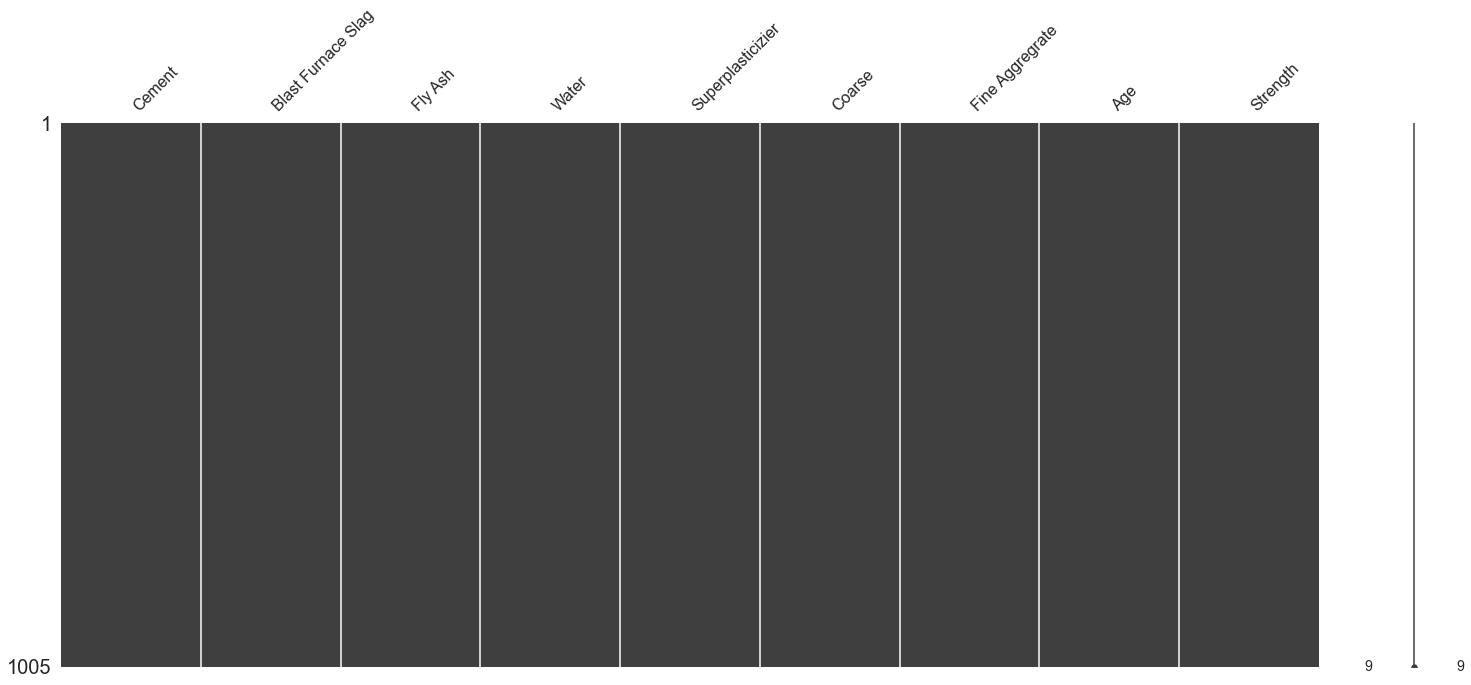

In [405]:
# Build a matrix of missing values
missingno.matrix(df, fontsize = 16)
plt.show()

Tidak ada data yang missing atau null

In [406]:
# Melihat statistika deksriptif 
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizier,Coarse,Fine Aggregrate,Age,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

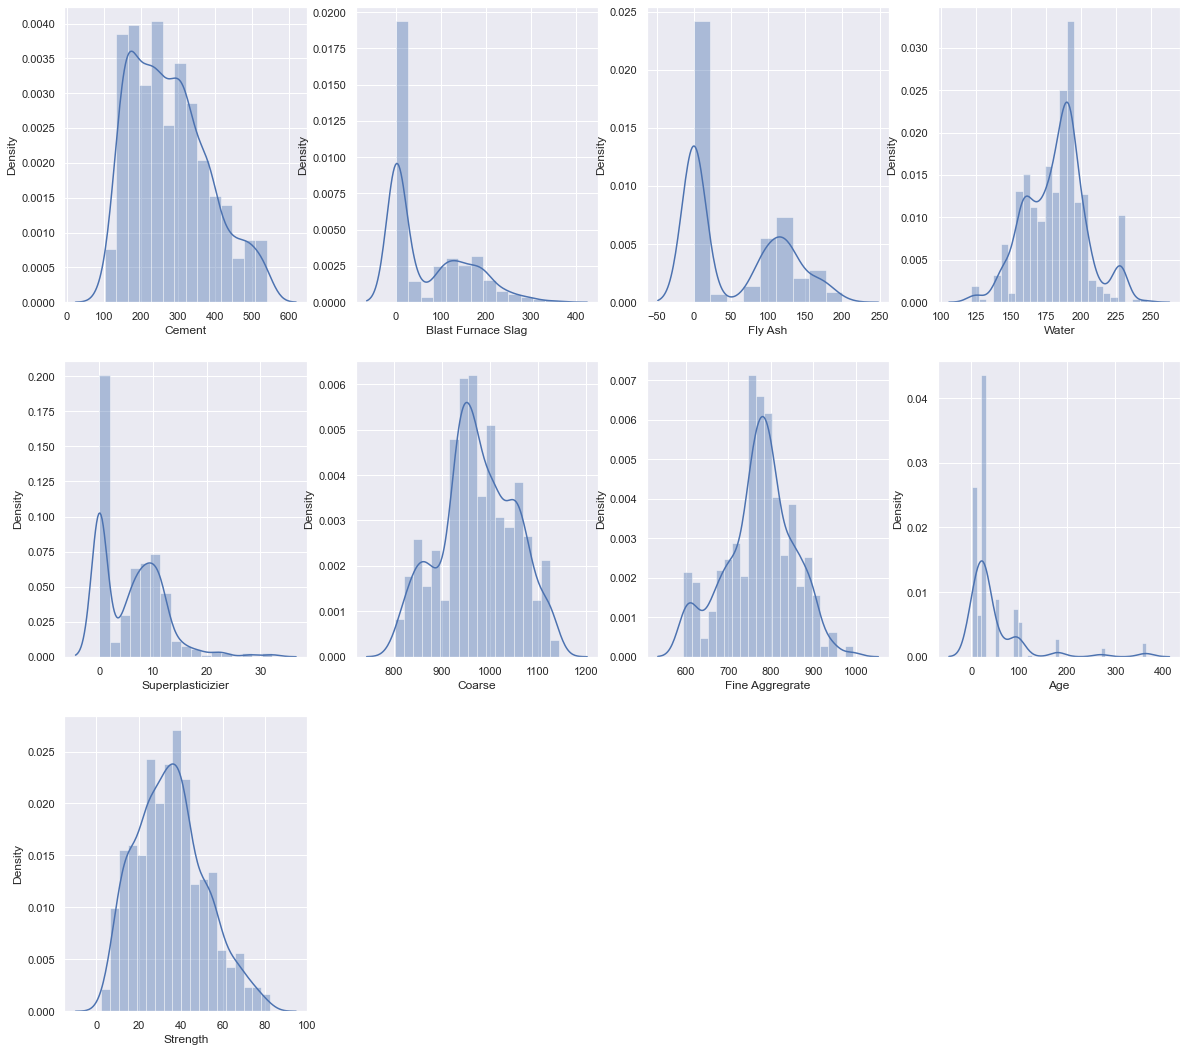

In [407]:
plt.figure(figsize = (20, 25))
feature_num = 1
for i in df:
    if feature_num < 13:
        ax = plt.subplot(4, 4, feature_num)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize = 12)
        
    feature_num += 1
plt.show()

Dari distribusi normal dari setiap kolom kita bisa melihat yang sudah cukup baik yaitu di kolom :
* Cement
* Water
* Coarse
* Fine Aggregrate
* Strength

Dan yang masih belum terlihat normal di :
* Blast Furnace Slag
* Fly Ash
* Superplasticizier
* Age


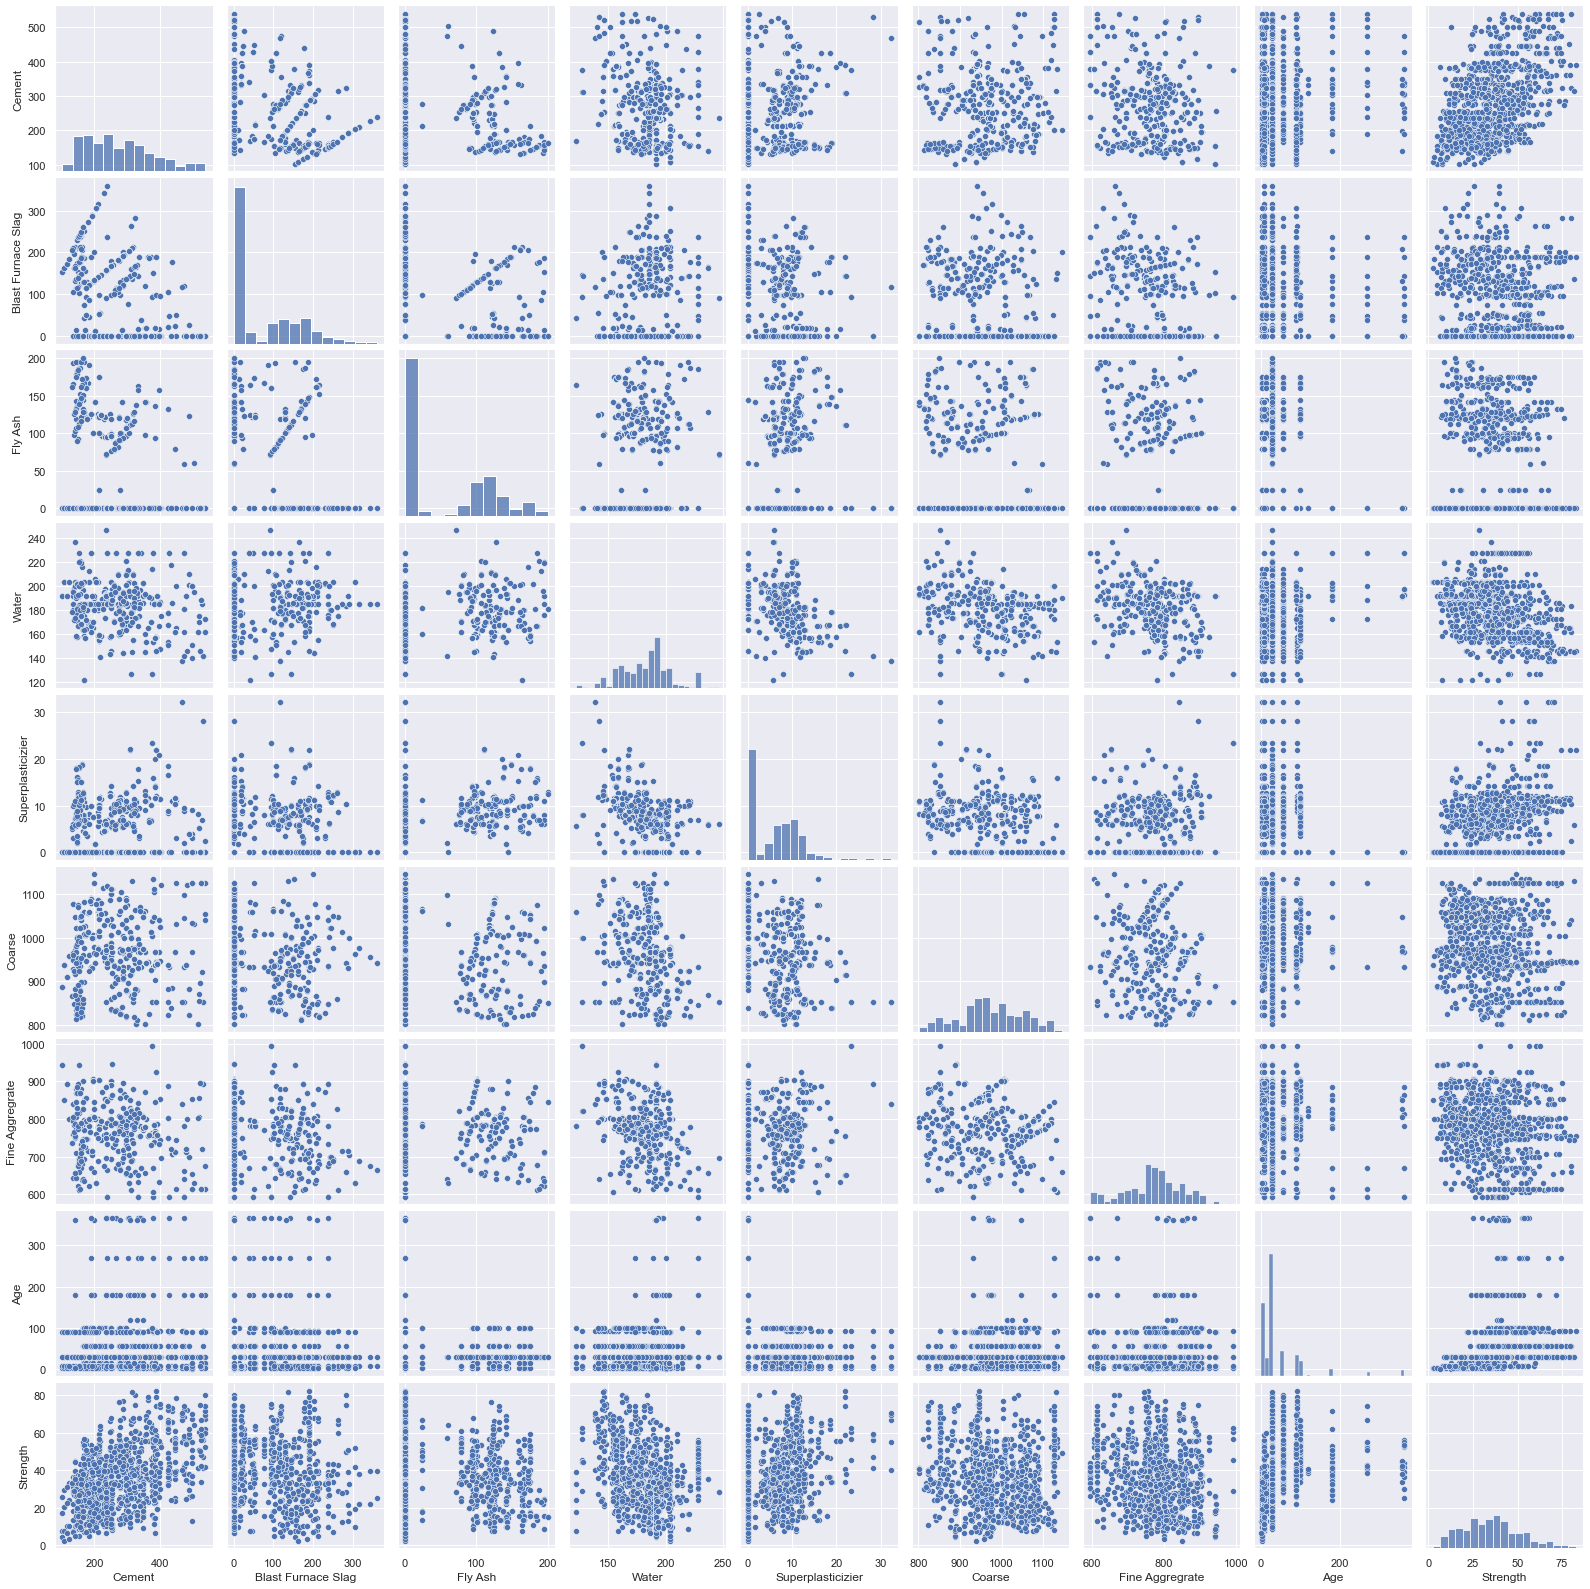

In [408]:
# Melihat persebaran data dari setiap kolom dataset
sns.pairplot(df)

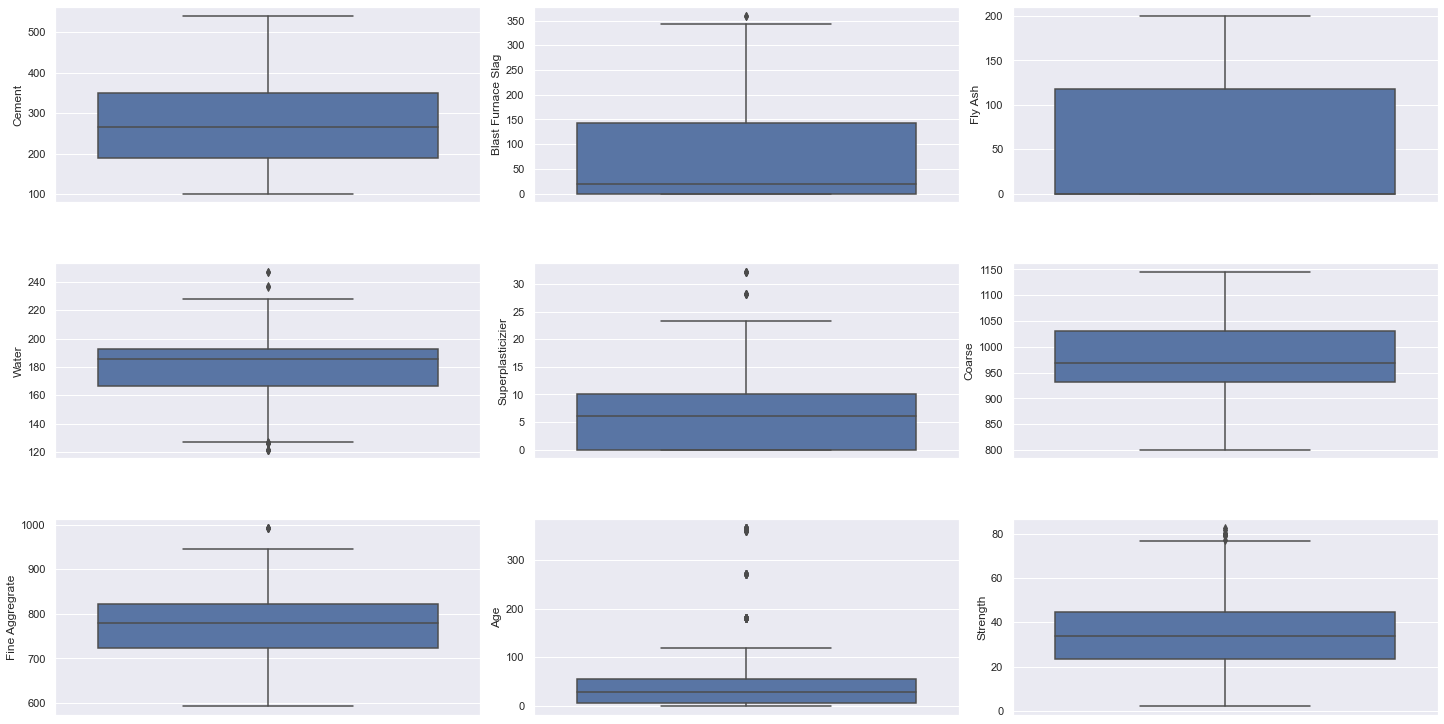

In [409]:
# Melihat apakah ada data outlier
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Terdapat beberapa kolom yang mengalami Outlier yaitu di :
* Water
* Superplasticizier
* Age

In [410]:
# Handling Outlier dengan menggunakan IQR
import scipy.stats as st
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df_clean=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

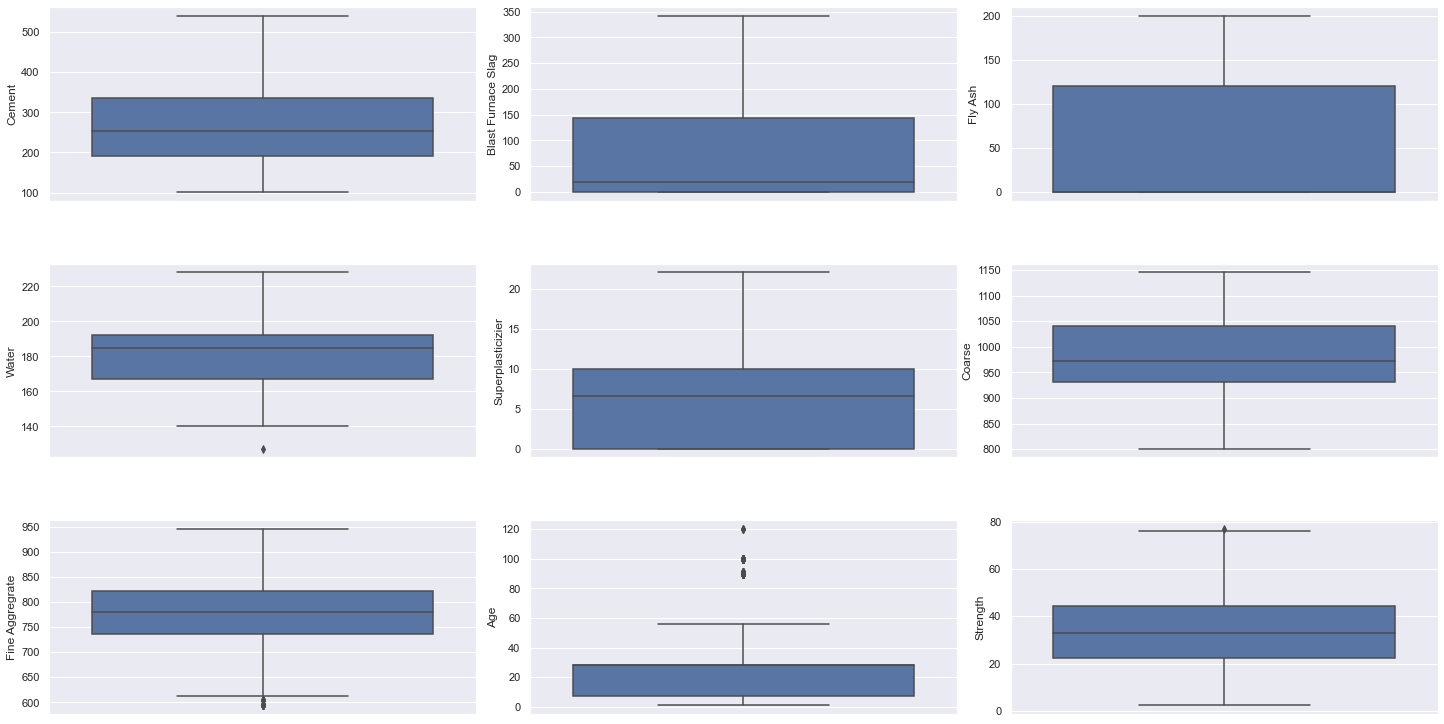

In [411]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df_clean.items():
    sns.boxplot(y=k, data=df_clean, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [412]:
df = df_clean

## Check For Corelation

In [413]:
label = df['Strength']
df_corr = df.drop(columns=['Strength'])
df_corr['Label'] = label

Text(0.5, 1.0, 'Heatmap Correlation for Price')

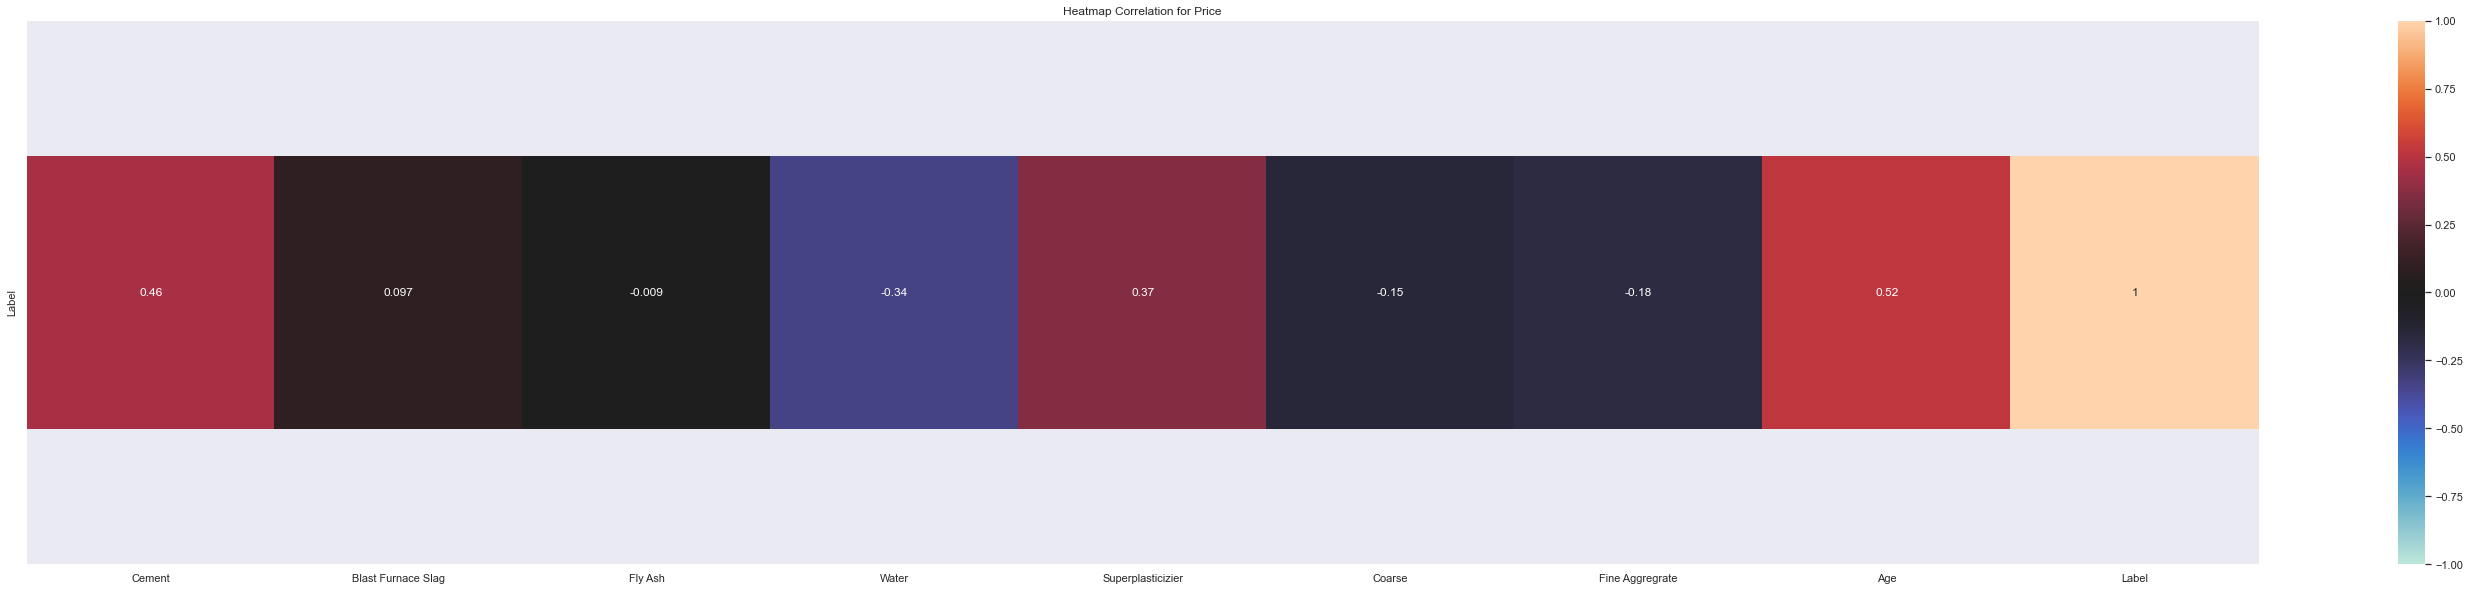

In [414]:
corr = df_corr.corr()
corr2 = corr.iloc[-1:,:]

plt.figure(figsize=(50, 10))
ax = sns.heatmap(corr2, annot=True, vmin=-1, vmax=1, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap Correlation for Price')

In [415]:
corr_matrix = df.corr()
corr_matrix["Strength"].sort_values(ascending=False)

Strength              1.000000
Age                   0.518331
Cement                0.457178
Superplasticizier     0.366191
Blast Furnace Slag    0.097370
Fly Ash              -0.008967
Coarse               -0.145272
Fine Aggregrate      -0.178192
Water                -0.341101
Name: Strength, dtype: float64

Terdapat korelasi yang cukup besar di kolom :
* Cement
* Age

Terdapat korelasi yang cukup di kolom :
* Superplasticizier
* Fly Ash
* Coarse
* Water

# Data Modelling

## Linear Regression
Dalam membuat model ini, akan dicoba dari tiap-tiap kolom yang memiliki korelasi dari yang tertinggi sampai yang cukup

In [416]:
import statsmodels.api as sm
from sklearn import datasets
X = df['Cement'] # Jumlah Cement yang dicampurkan
X = sm.add_constant(X) # menambahkan intercept (y = b0 + b1*x)
y = df['Strength'] # Kekuatan beton 

# Fit and make the predictions by the model
slr = sm.OLS(y, X).fit() # Ordinary least squares
predictions = slr.predict(X)

# Print out the statistics
slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     240.2
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           3.01e-48
Time:                        14:04:50   Log-Likelihood:                -3702.7
No. Observations:                 911   AIC:                             7409.
Df Residuals:                     909   BIC:                             7419.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.5751      1.340     10.880      0.000      11.946      17.204
Cement         0.0715      0.005     15.498      0.000       0.062       0.081
==============================================================================
Omnibus:                       25.029   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.441
Skew:                           0.246   Prob(JB):                     9.90e-05
Kurtosis:                       2.506   Cond. No.                         833.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Bila melihat dari Prob(F-Statistic) dan juga kolom P>|t| bisa disimpulkan data ini dapat diolah

In [417]:
# Membagi kolom menjadi X dan y
X_slr = df[['Cement']]
y_slr = df[['Strength']]

In [418]:
X_slr

,Cement
1,540.0
5,266.0
7,380.0
8,266.0
9,475.0
...,...
1025,276.4
1026,322.2
1027,148.5
1028,159.1


In [419]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [420]:
# Splitting data menjadi training test dan testing test
X_train, X_test, y_train, y_test = train_test_split(X_slr, y_slr, test_size=0.2, random_state=42)

In [421]:
print(y_train.shape)
print(y_test.shape)

(728, 1)
(183, 1)


In [422]:
X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)

# Fit and make the predictions by the model
slr = sm.OLS(y_train, X_train2).fit() # Ordinary least squares
predictions = slr.predict(X_test2)

# Print out the statistics
slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     189.8
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           1.58e-38
Time:                        14:04:55   Log-Likelihood:                -2954.6
No. Observations:                 728   AIC:                             5913.
Df Residuals:                     726   BIC:                             5922.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2058      1.493     10.184      0.000      12.274      18.137
Cement         0.0702      0.005     13.776      0.000       0.060       0.080
==============================================================================
Omnibus:                       17.246   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.884
Skew:                           0.283   Prob(JB):                     0.000586
Kurtosis:                       2.588   Cond. No.                         841.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [423]:
# Fitting X dan y ke model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train) # Training step

LinearRegression()

In [424]:
# Mencari intercept dan slope
print('intercept:', model_lr.intercept_[0])
print('slope:',model_lr.coef_[0][0])

intercept: 15.205801194153434
slope: 0.07024052275083718


> **y = $b_{1}$x + $b_{0}$**

- y : Target Variable (Strength of Concrete)
- b1 : Slope or Coeff
- x : feature (Cement)
- b0 : intercept

In [425]:
# Membuat fungsi kekuatan beton terhadap volume semen
def prediksi_kekuatan_beton(rm):
    return model_lr.coef_[0][0] * rm + model_lr.intercept_[0] 

In [426]:
X_test.head(1)

,Cement
816,525.0


In [427]:
y_test.head(1)

,Strength
816,42.423458


In [428]:
prediksi_kekuatan_beton(525)

52.08207563834296

Text(0.5, 1.0, 'Linear Regression Variabel : Volume of Cement')

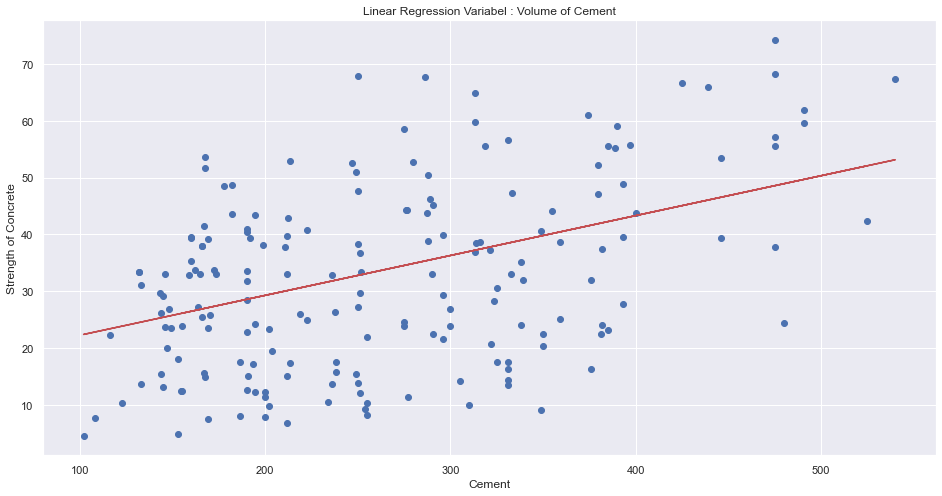

In [429]:
# membuat plotting antara semen dan kekuatan beton
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

y_pred_slr = model_lr.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_slr, c='r')
plt.xlabel('Cement')
plt.ylabel('Strength of Concrete')
plt.title('Linear Regression Variabel : Volume of Cement')

In [430]:
# mencetak hasil metric 
print('MSE :', metrics.mean_squared_error(y_test, y_pred_slr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))) # paling penting untuk komparasi model regresi
print('MAE :', metrics.mean_absolute_error(y_test, y_pred_slr))
print('R^2 :', model_lr.score(X_test,y_test))
acc_lr = model_lr.score(X_test, y_test)

MSE : 208.3560977116112
RMSE : 14.434545289395547
MAE : 12.26956573899257
R^2 : 0.20124213962169513


In [431]:
#membuat data frame antara hasil actual dan prediksi
compare = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_slr, columns=['Prediction']))

In [432]:
#compare['Residuals'] = compare['Strength']-compare['Prediction']
compare.head()

,Strength,Prediction
0,42.423458,52.082076
1,33.060374,25.460918
2,20.277489,39.789984
3,31.715896,28.575382
4,48.587374,27.710721


Bisa dilihat dari hasil RMSE dan R^2 nya menunjukkan hasil yang tidak baik, sehingga saya akan mencoba menambahkan kolom selanjutnya

## Multi Linear Regression

In [433]:
# menambahkan kolom Age pada X
X_mlr = df[['Cement','Age']]
y_mlr = df[['Strength']]

In [434]:
# Splitting data X dan y
X_train, X_test, y_train, y_test = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=42)

In [435]:
print(y_train.shape)
print(y_test.shape)

(728, 1)
(183, 1)


In [436]:
X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)

# Fit and make the predictions by the model
mlr = sm.OLS(y_train, X_train2).fit() # Ordinary least squares
predictions = mlr.predict(X_test2)

# Print out the statistics
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     357.4
Date:                Sat, 10 Jul 2021   Prob (F-statistic):          9.88e-109
Time:                        14:05:42   Log-Likelihood:                -2789.4
No. Observations:                 728   AIC:                             5585.
Df Residuals:                     725   BIC:                             5599.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2608      1.306      3.262      0.001       1.697       6.825
Cement         0.0748      0.004     18.371      0.000       0.067       0.083
Age            0.2944      0.014     20.405      0.000       0.266       0.323
==============================================================================
Omnibus:                       18.073   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.883
Skew:                           0.393   Prob(JB):                     7.94e-05
Kurtosis:                       3.057   Cond. No.                         927.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [437]:
# Fitting model ke Training Set
model_lr = LinearRegression()
model_lr.fit(X_train, y_train) # Training step

LinearRegression()

In [438]:
# Mencari intercept dan slope dari tiap variabel
print('intercept:', model_lr.intercept_[0])
print('b1:',model_lr.coef_[0][0]) # koefisien volume semen
print('b2:',model_lr.coef_[0][1]) # koefisien jumlah hari

intercept: 4.260791260788281
b1: 0.07481622860521397
b2: 0.2943735867176748


> **y = $b_{1}$$x_{1}$ + $b_{2}$$x_{2}$ + $b_{0}$**

- y : Target Variable (Strength of Concrete)
- b1 : Coeff 1
- b2 : Coeff 2
- x1 : feature 1 (Volume Cement)
- x2 : feature 2 (Age of Concrete)
- b0 : intercept

In [439]:
# Menghitung metric hasil perhitungan
y_pred_mlr = model_lr.predict(X_test)
print('MSE :', metrics.mean_squared_error(y_test, y_pred_mlr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr)))
print('MAE :', metrics.mean_absolute_error(y_test, y_pred_mlr))
print('R^2 :', model_lr.score(X_test,y_test))
acc_mlr = model_lr.score(X_test, y_test)

MSE : 127.66232287399887
RMSE : 11.298775282038266
MAE : 9.218075658475044
R^2 : 0.5105913146304955


In [440]:
compare_mlr = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_mlr, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['Strength']-compare_mlr['Prediction']
compare_mlr.head()

,Strength,Prediction
0,42.423458,45.599926
1,33.060374,23.426421
2,20.277489,32.507086
3,31.715896,34.986233
4,48.587374,34.065245


In [441]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_mlr['Strength']-compare_mlr['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 2.048856019130141
Little to no autocorrelation 

Assumption satisfied


In [442]:
#Cek Multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif["features"] = X_train2.columns
vif

,VIF Factor,features
0,9.922539,const
1,1.003041,Cement
2,1.003041,Age


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.049278704486143264
Residuals are not normally distributed


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


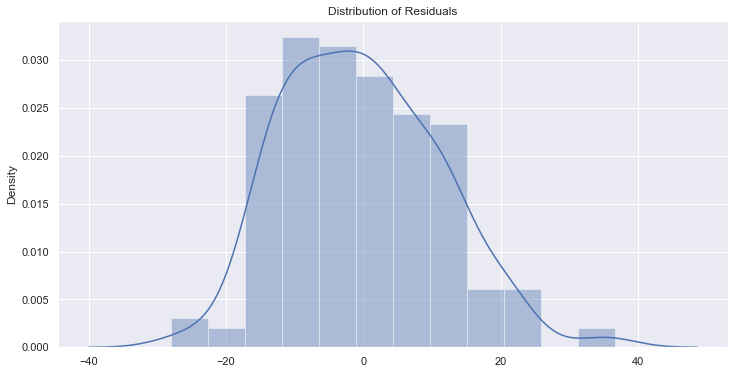


Assumption not satisfied


In [443]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_mlr['Strength']-compare_mlr['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_mlr['Strength']-compare_mlr['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

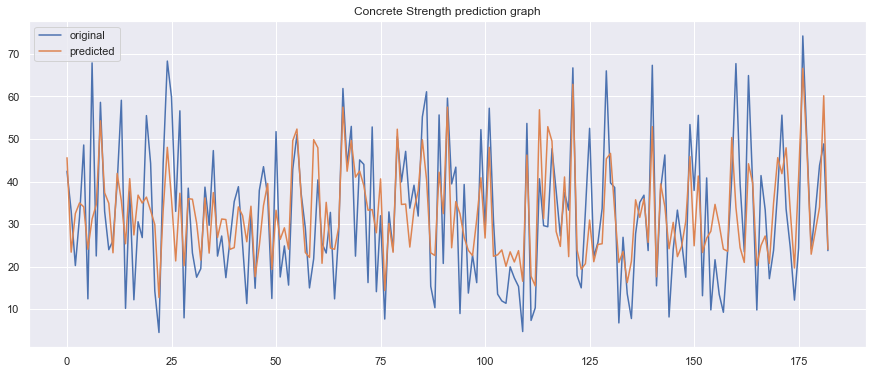

In [444]:
# Melihat perbandingan data actual dengan prediksi
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_mlr, label="predicted")
plt.title("Concrete Strength prediction graph")
plt.legend()
plt.show()

Berdasarkan hasil RMSE dan R^2 sudah ada cukup peningkatan yang ada, untuk selanjutnya saya akan mencoba menggunakan semua kolom yang ada

## Multi Linear Regression 2

In [445]:
#Membuat X dan y
X_mlr_2 = df.drop(columns='Strength')
y_mlr_2 = df[['Strength']]

In [446]:
# Splitting Data Training Set dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(X_mlr_2, y_mlr_2, test_size=0.2, random_state=42)

In [447]:
print(y_train.shape)
print(y_test.shape)

(728, 1)
(183, 1)


In [448]:
X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)

# Fit and make the predictions by the model
mlr = sm.OLS(y_train, X_train2).fit() # Ordinary least squares
predictions = mlr.predict(X_test2)

# Print out the statistics
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     258.9
Date:                Sat, 10 Jul 2021   Prob (F-statistic):          6.22e-206
Time:                        14:06:30   Log-Likelihood:                -2545.6
No. Observations:                 728   AIC:                             5109.
Df Residuals:                     719   BIC:                             5150.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 50.9090     25.133      2.026      0.043       1.567     100.251
Cement                 0.0996      0.008     12.583      0.000       0.084       0.115
Blast Furnace Slag     0.0702      0.009      7.407      0.000       0.052       0.089
Fly Ash                0.0468      0.012      4.056      0.000       0.024       0.069
Water                 -0.2504      0.039     -6.389      0.000      -0.327      -0.173
Superplasticizier      0.2088      0.099      2.116      0.035       0.015       0.403
Coarse                -0.0101      0.009     -1.165      0.244      -0.027       0.007
Fine Aggregrate       -0.0098      0.010     -0.962      0.336      -0.030       0.010
Age                    0.3056      0.010     29.366      0.000       0.285       0.326
==============================================================================
Omnibus:                        4.652   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.774
Skew:                           0.133   Prob(JB):                       0.0919
Kurtosis:                       3.294   Cond. No.                     1.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Berdasarkan nilai P>|t| yang melebihi 0,05 yaitu :
- Fine Aggregrate
- Coarse

In [449]:
X_mlr_2 = pd.DataFrame(X_mlr_2)

In [450]:
X_mlr_2 = X_mlr_2.drop(columns=['Coarse', 'Fine Aggregrate'])

In [451]:
X_mlr_2

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizier,Age
1,540.0,0.0,0.0,162.0,2.5,28
5,266.0,114.0,0.0,228.0,0.0,90
7,380.0,95.0,0.0,228.0,0.0,28
8,266.0,114.0,0.0,228.0,0.0,28
9,475.0,0.0,0.0,228.0,0.0,28
...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,28
1026,322.2,0.0,115.6,196.0,10.4,28
1027,148.5,139.4,108.6,192.7,6.1,28
1028,159.1,186.7,0.0,175.6,11.3,28


In [452]:
# Splitting Data Training Set dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(X_mlr_2, y_mlr_2, test_size=0.2, random_state=42)

In [453]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train) # Training step

LinearRegression()

In [454]:
print('intercept:', model_lr.intercept_[0])
print('b1:',model_lr.coef_[0][0]) # Volume Semen
print('b2:',model_lr.coef_[0][1]) # Volume Blast
print('b3:',model_lr.coef_[0][2]) # Volume Fly Ash
print('b4:',model_lr.coef_[0][3]) # Volume Water
print('b5:',model_lr.coef_[0][4]) # Volume Superplasticizer
print('b6:',model_lr.coef_[0][5]) # Age

intercept: 23.342621358511803
b1: 0.10686813856881634
b2: 0.07902021257782867
b3: 0.056110092342434116
b4: -0.21314897159389648
b5: 0.25025033366415456
b6: 0.30493953805576635


> **y = $b_{1}$$x_{1}$ + $b_{2}$$x_{2}$ + $b_{3}$$x_{3}$ + $b_{4}$$x_{4}$ + $b_{5}$$x_{5}$ + $b_{0}$**

- y : Target Variable (Strength of Concrete)
- b1 : Coeff 1
- b2 : Coeff 2
- b3 : Coeff 3
- b4 : Coeff 4
- b5 : Coeff 5
- b6 : Coeff 6
- x1 : feature 1 (Volume Cement)
- x2 : feature 2 (Volume Blast)
- x3 : feature 3 (Volume Fly Ash)
- x4 : feature 4 (Volume Water)
- x5 : feature 5 (Age )
- b0 : intercept

In [455]:
# Melihat hasil metric
y_pred_mlr_2 = model_lr.predict(X_test)
print('MSE :', metrics.mean_squared_error(y_test, y_pred_mlr_2))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr_2)))
print('MAE :', metrics.mean_absolute_error(y_test, y_pred_mlr_2))
print('R^2 :', model_lr.score(X_test,y_test))
acc_mlr2 = model_lr.score(X_test, y_test)

MSE : 48.4285215543856
RMSE : 6.959060393069283
MAE : 5.3014288198785104
R^2 : 0.8143435076634671


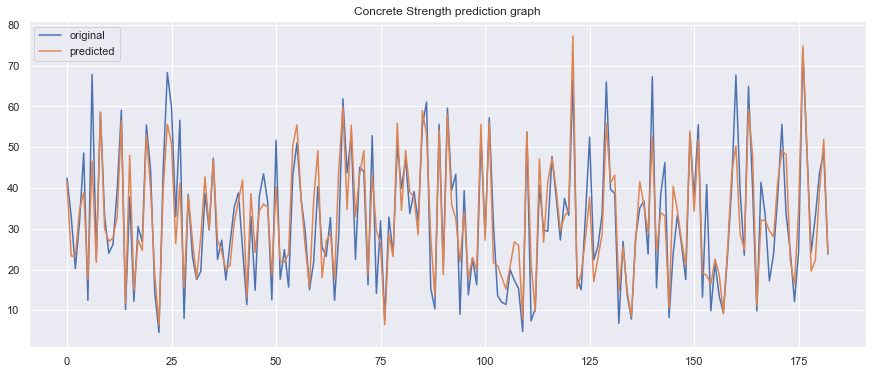

In [456]:
# Melihat hasil perbandingan actual dengan prediksi
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_mlr_2, label="predicted")
plt.title("Concrete Strength prediction graph")
plt.legend()
plt.show()

In [457]:
# Membuat fungsi kekuatan beton terhadap volume semen
def prediksi_kekuatan_beton2(s, b, f, w, sp, a):
    return model_lr.coef_[0][0] * s + model_lr.coef_[0][1] * b + model_lr.coef_[0][2] * f + model_lr.coef_[0][3] * w + model_lr.coef_[0][4] * sp + model_lr.coef_[0][5] * a + model_lr.intercept_[0] 

In [458]:
prediksi_kekuatan_beton2(500, 95, 90, 200, 10, 28)

57.74453523205648

Dari hasil 3 kali percobaan ini bisa disimpulkan kenaikan dari R^2 dan penurunan RMSE semakin baik, namun masih tetap kurang
Untuk itu, diperlukan model lain seperti Random Forest Regression, Decision Tree Regression, Polynomial Regression

## Random Forest Regression

In [459]:
# Membuat X dan y
X_rf = df.drop(columns='Strength')
y_rf = df[['Strength']]

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [461]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

<ipython-input-461-42db2652d05a>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


RandomForestRegressor()

In [462]:
# Model prediction on train data
y_pred_rfg = reg.predict(X_train)

In [463]:
# Model Evaluation Training
print('R^2:',metrics.r2_score(y_train, y_pred_rfg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_rfg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_rfg)))

R^2: 0.9835714345042414
Adjusted R^2: 0.9833886410077657
MAE: 1.3716638945527038
MSE: 4.066265849034665
RMSE: 2.0164984128520076


In [464]:
compare_rfg = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_rfg, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['Strength']-compare_mlr['Prediction']
compare_rfg.head(20)

,Strength,Prediction
0,42.423458,36.648525
1,33.060374,63.995788
2,20.277489,36.401609
3,31.715896,24.221085
4,48.587374,36.381008
5,12.459521,55.949891
6,67.865123,64.096157
7,22.532076,31.020546
8,58.605460,34.876040
9,33.019006,45.530306


In [465]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_rfg['Strength']-compare_rfg['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9386270737215714
Little to no autocorrelation 

Assumption satisfied


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.31325626005772134
Residuals are normally distributed


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


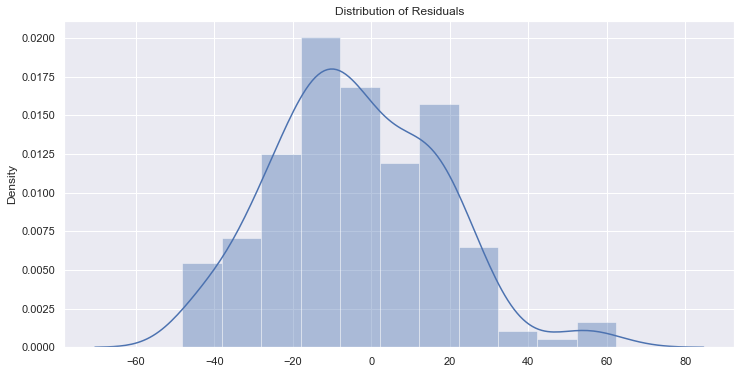


Assumption satisfied


In [466]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_rfg['Strength']-compare_rfg['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_rfg['Strength']-compare_rfg['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

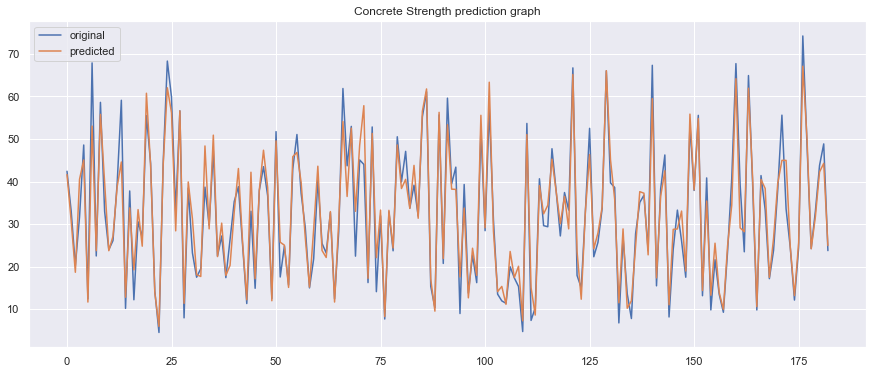

In [467]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_rfg, label="predicted")
plt.title("Concrete Strength prediction graph")
plt.legend()
plt.show()

In [468]:
# Prediksi tes data dengan model
y_test_pred_rfg = reg.predict(X_test)

In [469]:
# Model Evaluation Testing
acc_rf = metrics.r2_score(y_test, y_test_pred_rfg)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_rfg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfg)))
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfg))

R^2: 0.9249029709938963
Adjusted R^2: 0.9214502340280984
MAE: 3.192937715464006
MSE: 19.589070342339788
RMSE: 4.42595417309531


Bila melihat hasil perbandingan yang ada di model evaluation yang ada di training dan di testing bisa dilihat bahwa nilai R^2 meningkat dari sebelumnya dan RMSE juga menjadi lebih kecil dari sebelumnya

## XGBoost Regressor

In [470]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xbreg = XGBRegressor()

# Train the model using the training sets 
xbreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [471]:
# Model prediction on train data
y_pred_xg = xbreg.predict(X_train)

E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [472]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_xg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_xg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_xg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_xg)))

R^2: 0.9960831554588143
Adjusted R^2: 0.9960395744347121
MAE: 0.3324650119106562
MSE: 0.96946572711495
RMSE: 0.9846145068578617


In [473]:
compare_xg = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_xg, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['Strength']-compare_mlr['Prediction']
compare_xg.head(20)

,Strength,Prediction
0,42.423458,33.186974
1,33.060374,65.127701
2,20.277489,39.335129
3,31.715896,24.541519
4,48.587374,37.366905
5,12.459521,55.342449
6,67.865123,65.868675
7,22.532076,31.402960
8,58.605460,33.575012
9,33.019006,41.304173


In [474]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_xg['Strength']-compare_xg['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.927945271424979
Little to no autocorrelation 

Assumption satisfied


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.45080626915827937
Residuals are normally distributed


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


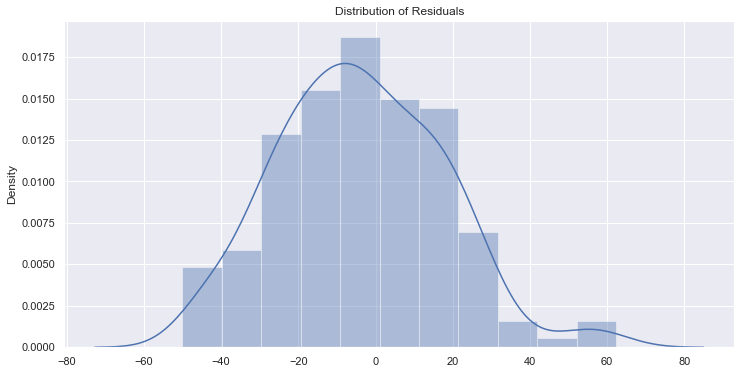


Assumption satisfied


In [475]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_xg['Strength']-compare_xg['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_xg['Strength']-compare_xg['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

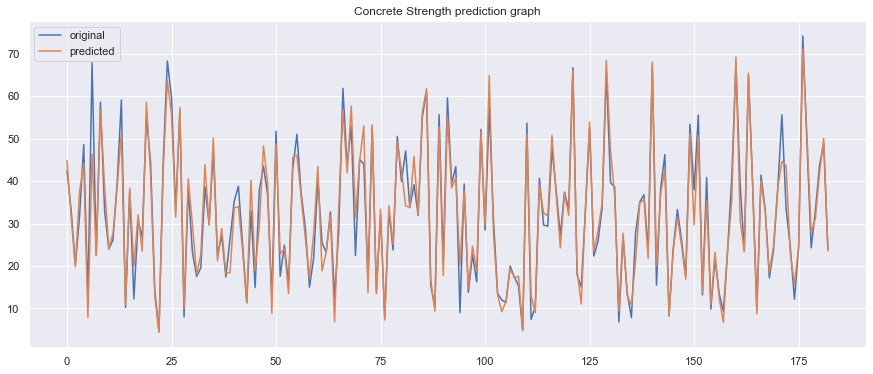

In [476]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_xg, label="predicted")
plt.title("Concrete Strength prediction graph")
plt.legend()
plt.show()

In [477]:
# Prediksi tes data dengan model
y_test_pred_xg = xbreg.predict(X_test)

E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [478]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred_xg)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_xg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_xg))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xg)))
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xg))

R^2: 0.939405606941022
Adjusted R^2: 0.9366196578348621
MAE: 2.7536399431721317
MSE: 15.806055761370125
RMSE: 3.975683055950276


Dari hasil modelling menggunakan XGBoost ternyata tidak berbeda jauh dengan Random Forest Classifier dengan nilai R^2 sekitar 0.93 dan RMSE mencapai 4.0

## Kesimpulan

In [479]:
# Membandingkan hasil dari modelling yang sudah dilakukan
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Multi Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_lr*100, acc_mlr2*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
3,XGBoost,93.940561
2,Random Forest,92.490297
1,Multi Linear Regression,81.434351
0,Linear Regression,20.124214


In [480]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'RMSE Score': [rmse_rf, rmse_xgb]})
models.sort_values(by='RMSE Score', ascending=False)

,Model,RMSE Score
0,Random Forest,4.425954
1,XGBoost,3.975683


## Hyperparameter Tuning

In [482]:
from sklearn.model_selection import cross_val_score, GridSearchCV
model = XGBRegressor(n_jobs=4)

parameters = {
    'n_estimators': [50, 100, 500],
    'max_depth': [2, 4, 6, 8, 10],
    'gamma': [0.001, 0.01],
    'learning_rate': [0.01, 0.1],
    'booster': ['gbtree']
}

grid_obj = GridSearchCV(
    estimator=xbreg,
    param_grid=parameters
)

grid_obj.fit(X_rf, y_rf)

best_model = grid_obj.best_estimator_
print(best_model)

E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [483]:
xgc = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [484]:
# Train the model using the training sets 
xgc.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [485]:
# Model prediction on train data
y_pred_xgc = xgc.predict(X_train)

E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [486]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_xgc))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_xgc))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_xgc))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_xgc))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_xgc)))

R^2: 0.9611501811070355
Adjusted R^2: 0.9607179160845826
MAE: 2.2805507764450645
MSE: 9.615793408525388
RMSE: 3.100934279942964


In [487]:
compare_xgc = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_xgc, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['Strength']-compare_mlr['Prediction']
compare_xgc.head(20)

,Strength,Prediction
0,42.423458,37.007206
1,33.060374,67.598328
2,20.277489,37.918819
3,31.715896,23.951643
4,48.587374,35.830482
5,12.459521,57.975903
6,67.865123,63.208149
7,22.532076,31.521444
8,58.605460,36.029701
9,33.019006,44.843529


In [488]:
# Prediksi tes data dengan model
y_test_pred_xgc = xgc.predict(X_test)
# Model Evaluation
acc_xgc = metrics.r2_score(y_test, y_test_pred_xgc)
print('R^2:', acc_xgc)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_xgc))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_xgc))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_xgc))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xgc)))
rmse_xgc = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xgc))

R^2: 0.92670068409707
Adjusted R^2: 0.9233306006072801
MAE: 3.3241120376381894
MSE: 19.120136632185268
RMSE: 4.372657845313908


E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


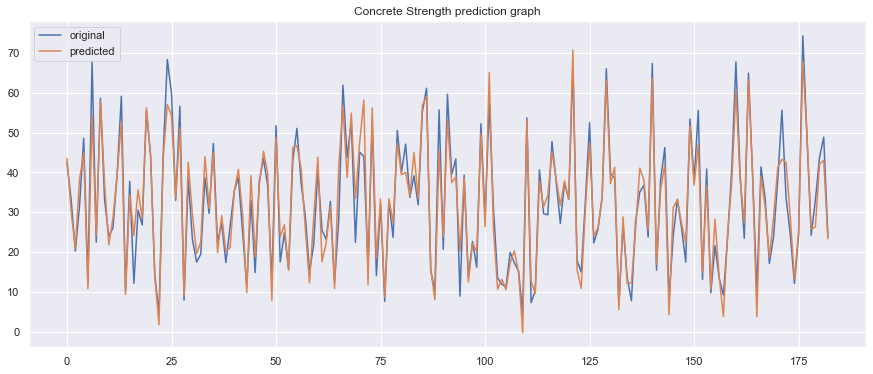

In [489]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_xgc, label="predicted")
plt.title("Concrete Strength prediction graph")
plt.legend()
plt.show()

# Kesimpulan Akhir
Berdasarkan hasil pengolahan dari berbagai model dan hyperparameter tuning, maka didapatkan model yang terbaik adalah **XGBoost** tanpa hyperparameter tuning dengan nilai R^2 pada testing yaitu 93,9 dan RMSE 3,975 

## XGBOOST Regression